In [1]:
# HAR classification 
# Author: Burak Himmetoglu
# 8/15/2017

import pandas as pd 
import numpy as np
import os

def read_data(data_path, split = "train"):
	""" Read data """

	# Fixed params
	n_class = 6
	n_steps = 128

	# Paths
	path_ = os.path.join(data_path, split)
	path_signals = os.path.join(path_, "Inertial_Signals")

	# Read labels and one-hot encode
	label_path = os.path.join(path_, "y_" + split + ".txt")
	labels = pd.read_csv(label_path, header = None)

	# Read time-series data
	channel_files = os.listdir(path_signals)
	channel_files.sort()
	n_channels = len(channel_files)
	posix = len(split) + 5

	# Initiate array
	list_of_channels = []
	X = np.zeros((len(labels), n_steps, n_channels))
	i_ch = 0
	for fil_ch in channel_files:
		channel_name = fil_ch[:-posix]
		dat_ = pd.read_csv(os.path.join(path_signals,fil_ch), delim_whitespace = True, header = None)
		X[:,:,i_ch] = dat_.as_matrix()

		# Record names
		list_of_channels.append(channel_name)

		# iterate
		i_ch += 1

	# Return 
	return X, labels[0].values, list_of_channels

# test and train read
Xtrain, Ytrain, _ = read_data(data_path="/home/arasdar/datasets/har-data/", split="train")
Xtest, Ytest, _ = read_data(data_path="/home/arasdar/datasets/har-data/", split="test")

# assert list_ch_train_valid == list_ch_test, "Mistmatch in channels!"
assert Ytrain.max(axis=0) == Ytest.max(axis=0), 'Mismatch in channels of Ytrain and Ytest'

# balanced data or not
print(np.mean(Ytrain==1), np.mean(Ytrain==2), np.mean(Ytrain==3), 
      np.mean(Ytrain==4), np.mean(Ytrain==5), np.mean(Ytrain==6))

print(Xtrain.shape, Xtrain.dtype, Xtest.shape, Xtest.dtype)
print(Ytrain.shape, Ytrain.dtype, Ytest.shape, Ytest.dtype)

/home/arasdar/anaconda3/envs/env/lib/python3.6/site-packages/ipykernel_launcher.py:37: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


0.16675734494015235 0.1459466811751904 0.13411316648531013 0.1749183895538629 0.1868879216539717 0.1913764961915125
(7352, 128, 9) float64 (2947, 128, 9) float64
(7352,) int64 (2947,) int64


In [2]:
# # standardizing/normalizing the train and test data
# def standardize(train, test):
# """ Standardize data """
# # Standardize train and test
# X_train = (train - np.mean(train, axis=0)[None,:,:]) / np.std(train, axis=0)[None,:,:]
# X_test = (test - np.mean(test, axis=0)[None,:,:]) / np.std(test, axis=0)[None,:,:]
# return X_train, X_test

Xtrain = (Xtrain - Xtrain.mean(axis=0))/ Xtrain.std(axis=0)
Xtest = (Xtest - Xtest.mean(axis=0))/ Xtest.std(axis=0)
print(Xtrain.shape, Xtrain.dtype)
print(Xtest.shape, Xtest.dtype)
# # Normalizing/standardizing the input data features
# Xtrain, Xtest = standardize(train=Xtrain, test=Xtest)

(7352, 128, 9) float64
(2947, 128, 9) float64


In [3]:
print(Xtrain.mean(axis=0), Xtrain.std(axis=0))

[[ 7.29829690e-17 -1.02082531e-17  1.57352066e-17 ... -4.98687012e-15
   1.85772084e-16  1.49046535e-16]
 [-3.78883238e-17 -3.43169454e-17  2.59223183e-16 ...  1.22050349e-15
   4.80512740e-17 -4.62565242e-16]
 [ 1.84533805e-17 -2.06052682e-17 -3.44906065e-17 ... -2.15841883e-16
   2.85362956e-16 -3.28763132e-16]
 ...
 [ 4.40797199e-17 -2.73629505e-17 -1.20505709e-17 ...  5.30356876e-15
   5.48165068e-17 -3.37113966e-16]
 [ 2.29534684e-17  5.79273058e-17  8.81896418e-18 ...  2.48264790e-15
  -1.15794208e-16  4.64958745e-17]
 [ 4.27810368e-17  1.22921864e-17 -3.12589997e-17 ... -1.67407304e-15
   1.10599475e-16 -3.55174722e-16]] [[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


In [4]:
print(Xtest.mean(axis=0), Xtest.std(axis=0))

[[ 7.16540276e-17  1.80830354e-17  2.95356244e-17 ... -4.00445992e-15
   3.99333697e-17  2.13869566e-16]
 [ 5.58878811e-17  3.33782694e-17  5.28928784e-17 ...  6.23404167e-15
   7.13526437e-17 -1.22135835e-16]
 [ 1.11512051e-17  8.43874983e-18  4.68652000e-17 ... -2.75390501e-15
  -1.09251672e-17 -8.88329112e-17]
 ...
 [ 1.58980019e-17 -3.98580238e-17  3.31522315e-18 ... -1.33149533e-15
   6.84894964e-17 -1.86330610e-16]
 [ 4.07810120e-17  5.57277709e-17  3.27001556e-17 ...  3.11386101e-16
   1.40520254e-17 -2.61751937e-16]
 [ 9.20162788e-18 -4.68275270e-17 -4.47555125e-17 ... -1.35942986e-16
   4.69028729e-17  2.26923257e-16]] [[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


In [5]:
# # # Onehotencoding of the output labels
# # def onehot(labels, n_class):
# # 	""" One-hot encoding """
# # 	expansion = np.eye(n_class)
# # 	y = expansion[:, labels-1].T
# # 	assert y.shape[1] == n_class, "Wrong number of labels!"

# # 	return y

# print(Ytrain.max(axis=0), Ytest.max(axis=0))
# assert Ytrain.max(axis=0) == Ytest.max(axis=0), 'wrong labels'

# # Ytrain=onehot(labels=Ytrain, n_class=Ytrain.max(axis=0))
# # Ytest=onehot(labels=Ytest, n_class=Ytest.max(axis=0))
# # print(Ytrain.shape, Ytrain.dtype, Ytest.shape, Ytest.dtype)

In [5]:
from sklearn.model_selection import train_test_split

# Now separating train and validation set
# 30% of the training data/ entire training data is assigned to validation.
Xtrain, Xvalid, Ytrain, Yvalid = train_test_split(Xtrain, Ytrain, test_size=0.30)
print(Xtrain.shape, Xvalid.shape, Xtest.shape, Xtrain.dtype, Xvalid.dtype, Xtest.dtype)
print(Ytrain.shape, Yvalid.shape, Ytest.shape, Ytrain.dtype, Yvalid.dtype, Ytest.dtype)

(5146, 128, 9) (2206, 128, 9) (2947, 128, 9) float64 float64 float64
(5146,) (2206,) (2947,) int64 int64 int64


In [6]:
# In this one we should define and detect GPUs for tensorflow
# GPUs or CPU
import tensorflow as tf

# Check TensorFlow Version
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.8.0
Default GPU Device: /device:GPU:0


In [8]:
# now I can design the actual input and output tensors
N, W, Cin = Xvalid.shape[0]//100, Xvalid.shape[1], Xvalid.shape[2]
Xinputs = tf.placeholder(dtype=tf.float32, name=None, shape=[N, W, Cin])
print(Xinputs.shape, Xinputs.dtype, Xtrain.shape, Xtrain.dtype, Xvalid.shape, Xvalid.dtype, Xtest.shape, Xtest.dtype)

(22, 128, 9) <dtype: 'float32'> (5146, 128, 9) float64 (2206, 128, 9) float64 (2947, 128, 9) float64


In [9]:
# # This is the output tensor for labels
# N, Cout = Yvalid.shape[0], Yvalid.shape[1]
# Ylabels = tf.placeholder(dtype=tf.float32, name=None, shape=[N, Cout])
# print(Ylabels.shape, Ylabels.dtype, Ytrain.shape, Ytrain.dtype, Yvalid.shape, Yvalid.dtype, Ytest.shape, Ytest.dtype)

In [10]:
# This is the output tensor for indices which sould be onehot-encoded for training
Yindices = tf.placeholder(dtype=tf.int32, name=None, shape=[N])
print(Yindices.shape, Yindices.dtype, Ytrain.shape, Ytrain.dtype, Yvalid.shape, Yvalid.dtype, Ytest.shape, Ytest.dtype)

(22,) <dtype: 'int32'> (5146,) int64 (2206,) int64 (2947,) int64


In [11]:
print(Xinputs.shape, Xinputs.dtype)
Xinputs_vec = tf.reshape(tensor=Xinputs, shape=[N, W*Cin]) # (W*N, Cin)
print(Xinputs_vec.shape, Xinputs_vec.dtype)
inputs = tf.split(value=Xinputs_vec, num_or_size_splits=N, axis=0)
print(len(inputs), inputs[0].shape, inputs[0].dtype)

(22, 128, 9) <dtype: 'float32'>
(22, 1152) <dtype: 'float32'>
22 (1, 1152) <dtype: 'float32'>


In [12]:
# RNN-LSTM parameters
lstm_size = W*Cin # 3 times the amount of channels
print(lstm_size)

# Add LSTM layers
# lstm = tf.contrib.rnn.BasicLSTMCell(lstm_size)
lstm = tf.nn.rnn_cell.BasicLSTMCell(num_units=lstm_size)
print(lstm)

1152


In [13]:
# drop = tf.nn.rnn_cell.DropoutWrapper(lstm, output_keep_prob=keep_prob_)
lstm_layers = 2 # Number of layers
cell = tf.nn.rnn_cell.MultiRNNCell(cells=[lstm] * lstm_layers)

In [15]:
initial_state = cell.zero_state(batch_size=1, dtype=tf.float32)
print(initial_state)

(LSTMStateTuple(c=<tf.Tensor 'MultiRNNCellZeroState_1/BasicLSTMCellZeroState/zeros:0' shape=(1, 1152) dtype=float32>, h=<tf.Tensor 'MultiRNNCellZeroState_1/BasicLSTMCellZeroState/zeros_1:0' shape=(1, 1152) dtype=float32>), LSTMStateTuple(c=<tf.Tensor 'MultiRNNCellZeroState_1/BasicLSTMCellZeroState_1/zeros:0' shape=(1, 1152) dtype=float32>, h=<tf.Tensor 'MultiRNNCellZeroState_1/BasicLSTMCellZeroState_1/zeros_1:0' shape=(1, 1152) dtype=float32>))


In [16]:
outputs, final_state = tf.nn.static_rnn(cell=cell, inputs=inputs, dtype=tf.float32, initial_state=initial_state)
print(len(outputs), outputs[0].shape, outputs[0].dtype, len(final_state))

22 (1, 1152) <dtype: 'float32'> 2


In [17]:
print(Ytrain.max(axis=0), Yvalid.max(axis=0), Ytest.max(axis=0))
print(Ytrain.min(axis=0), Yvalid.min(axis=0), Ytest.min(axis=0))
assert Ytrain.max(axis=0) == Ytest.max(axis=0), 'wrong labels'
Cout = Ytrain.max(axis=0)

6 6 6
1 1 1


In [18]:
outputs_ = tf.concat(outputs, axis=0)
print(outputs_)

Tensor("concat:0", shape=(22, 1152), dtype=float32)


In [19]:
# We only need the last output tensor to pass into a classifier
Ylogits = tf.layers.dense(inputs=outputs_, units=Cout, name=None)
print(Ylogits.shape, Ylogits.dtype)
print(len(outputs), outputs[-1].shape, outputs[-1].dtype, final_state)

(22, 6) <dtype: 'float32'>
22 (1, 1152) <dtype: 'float32'> (LSTMStateTuple(c=<tf.Tensor 'rnn/rnn/multi_rnn_cell/cell_0/basic_lstm_cell/Add_85:0' shape=(1, 1152) dtype=float32>, h=<tf.Tensor 'rnn/rnn/multi_rnn_cell/cell_0/basic_lstm_cell/Mul_128:0' shape=(1, 1152) dtype=float32>), LSTMStateTuple(c=<tf.Tensor 'rnn/rnn/multi_rnn_cell/cell_0/basic_lstm_cell/Add_87:0' shape=(1, 1152) dtype=float32>, h=<tf.Tensor 'rnn/rnn/multi_rnn_cell/cell_0/basic_lstm_cell/Mul_131:0' shape=(1, 1152) dtype=float32>))


In [20]:
# Backward pass: error backpropagation
# Cost function
Ylabels = tf.one_hot(depth=Cout, indices=Yindices, dtype=Ylogits.dtype)
loss = tf.nn.softmax_cross_entropy_with_logits_v2(logits=Ylogits, labels=Ylabels)
print(loss)
loss = tf.reduce_mean(input_tensor=loss)
print(loss)

Tensor("softmax_cross_entropy_with_logits/Reshape_2:0", shape=(22,), dtype=float32)
Tensor("Mean:0", shape=(), dtype=float32)


In [21]:
# Optimizer for training, using gradient clipping to control exploding gradients
tvars = tf.trainable_variables()
#grads, _ = tf.clip_by_global_norm(tf.gradients(loss, tvars), grad_clip)
grads = tf.gradients(loss, tvars)
learning_rate = 0.001
train_op = tf.train.AdamOptimizer(learning_rate)
optimizer = train_op.apply_gradients(zip(grads, tvars))

In [23]:
print(tvars, grads, train_op, optimizer)

[<tf.Variable 'rnn/multi_rnn_cell/cell_0/basic_lstm_cell/kernel:0' shape=(2304, 4608) dtype=float32_ref>, <tf.Variable 'rnn/multi_rnn_cell/cell_0/basic_lstm_cell/bias:0' shape=(4608,) dtype=float32_ref>, <tf.Variable 'dense/kernel:0' shape=(1152, 6) dtype=float32_ref>, <tf.Variable 'dense/bias:0' shape=(6,) dtype=float32_ref>] [<tf.Tensor 'gradients/AddN_85:0' shape=(2304, 4608) dtype=float32>, <tf.Tensor 'gradients/AddN_84:0' shape=(4608,) dtype=float32>, <tf.Tensor 'gradients/dense/MatMul_grad/MatMul_1:0' shape=(1152, 6) dtype=float32>, <tf.Tensor 'gradients/dense/BiasAdd_grad/BiasAddGrad:0' shape=(6,) dtype=float32>] <tensorflow.python.training.adam.AdamOptimizer object at 0x7fc55032cc50> name: "Adam"
op: "NoOp"
input: "^Adam/update_rnn/multi_rnn_cell/cell_0/basic_lstm_cell/kernel/ApplyAdam"
input: "^Adam/update_rnn/multi_rnn_cell/cell_0/basic_lstm_cell/bias/ApplyAdam"
input: "^Adam/update_dense/kernel/ApplyAdam"
input: "^Adam/update_dense/bias/ApplyAdam"
input: "^Adam/Assign"
input

In [24]:
# Accuracy
Ylogits_argmax = tf.argmax(input=Ylogits, axis=1)
print(Ylogits_argmax)
Ylabels_argmax = tf.argmax(input=Ylabels, axis=1)
print(Ylabels_argmax)
accuracy = tf.equal(x=Ylogits_argmax, y=Ylabels_argmax, name=None)
print(accuracy)
accuracy = tf.cast(x=accuracy, dtype=tf.float32)
print(accuracy)
accuracy = tf.reduce_mean(input_tensor=accuracy, name=None)
print(accuracy)

Tensor("ArgMax:0", shape=(22,), dtype=int64)
Tensor("ArgMax_1:0", shape=(22,), dtype=int64)
Tensor("Equal:0", shape=(22,), dtype=bool)
Tensor("Cast:0", shape=(22,), dtype=float32)
Tensor("Mean_1:0", shape=(), dtype=float32)


In [25]:
# # Confusion matrix
# confusion_matrix = tf.confusion_matrix(predictions=tf.argmax(logits, 1),
#                                        labels=tf.argmax(labels_, 1))
# print('confusion_matrix', confusion_matrix)

In [26]:
def get_batches(X, Y, batch_size):
    """ Return a generator for batches """
    n_batches = len(X) // batch_size
    X, Y = X[:n_batches*batch_size], Y[:n_batches*batch_size]

    # Loop over batches and yield
    for b in range(0, len(X), batch_size):
        yield X[b:b+batch_size], Y[b:b+batch_size]

In [ ]:
train_acc, train_loss = [], []
valid_acc, valid_loss = [], []

# Save the training result or trained and validated model params
saver = tf.train.Saver()

with tf.Session() as sess:
    
    # Initialize the variables in the case, we don't load any pre-trained model.
    sess.run(fetches=tf.global_variables_initializer())
   
    #     # Restore the validated model
    #     saver.restore(sess, tf.train.latest_checkpoint('checkpoints'))
    #     #saver.restore(sess=sess, save_path='checkpoints/lstm-imu-har.ckpt')
    
    # Loop over epochs
    epochs = 200
    for epoch in range(epochs):
        
        # Loop over batches of training
        state = sess.run(fetches=initial_state)
        loss_batch, acc_batch = [], []
        for Xarr, Yarr in get_batches(X=Xtrain, Y=Ytrain, batch_size=N):
            
            # Feed dictionary
            feed_dict = {Xinputs:Xarr, Yindices:Yarr, initial_state:state}
            lossarr, _ , state, accarr = sess.run(fetches=[loss, optimizer, final_state, accuracy], 
                                                  feed_dict=feed_dict)
            loss_batch.append(lossarr)
            acc_batch.append(accarr)
            
        # acc and loss for plotting
        train_acc.append(np.mean(acc_batch))
        train_loss.append(np.mean(loss_batch))

        # Loop over batches of validation
        state = sess.run(fetches=initial_state)
        loss_batch, acc_batch = [], []
        for Xarr, Yarr in get_batches(X=Xvalid, Y=Yvalid, batch_size=N):
            
            # Feed dictionary
            feed_dict = {Xinputs:Xarr, Yindices:Yarr, initial_state:state}
            lossarr, state, accarr = sess.run(fetches=[loss, final_state, accuracy], feed_dict=feed_dict)
            loss_batch.append(lossarr)
            acc_batch.append(accarr)
            
        # acc and loss for plotting
        valid_acc.append(np.mean(acc_batch))
        valid_loss.append(np.mean(loss_batch))
            
        # Print info for every iter/epoch
        print("Epoch: {}/{}".format(epoch+1, epochs),
              "Train loss: {:6f}".format(train_loss[epoch]),
              "Valid loss: {:.6f}".format(valid_loss[epoch]),
              "Train acc: {:6f}".format(train_acc[epoch]),
              "Valid acc: {:.6f}".format(valid_acc[epoch]))
                
    saver.save(sess, 'checkpoints/lstm-imu-har.ckpt')

Epoch: 1/200 Train loss: 0.714036 Valid loss: 0.234331 Train acc: 0.532384 Valid acc: 0.720000
Epoch: 2/200 Train loss: 0.189993 Valid loss: 0.194675 Train acc: 0.738588 Valid acc: 0.734545
Epoch: 3/200 Train loss: 0.117387 Valid loss: 0.211650 Train acc: 0.762388 Valid acc: 0.737273
Epoch: 4/200 Train loss: 0.092620 Valid loss: 0.235438 Train acc: 0.776044 Valid acc: 0.726364
Epoch: 5/200 Train loss: 0.063301 Valid loss: 0.223571 Train acc: 0.788919 Valid acc: 0.736818
Epoch: 6/200 Train loss: 0.055669 Valid loss: 0.213695 Train acc: 0.790285 Valid acc: 0.734091
Epoch: 7/200 Train loss: 0.052757 Valid loss: 0.221584 Train acc: 0.794187 Valid acc: 0.743636
Epoch: 8/200 Train loss: 0.057068 Valid loss: 0.198651 Train acc: 0.794186 Valid acc: 0.744091
Epoch: 9/200 Train loss: 0.055858 Valid loss: 0.200757 Train acc: 0.793406 Valid acc: 0.743636
Epoch: 10/200 Train loss: 0.039361 Valid loss: 0.209038 Train acc: 0.801405 Valid acc: 0.743182
Epoch: 11/200 Train loss: 0.029432 Valid loss: 0.

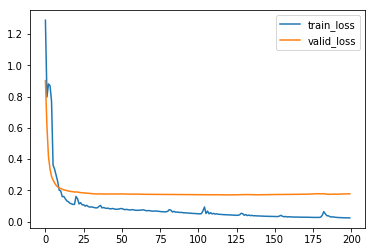

In [27]:
import matplotlib.pyplot as mplot
%matplotlib inline

mplot.plot(train_loss, label='train_loss')
mplot.plot(valid_loss, label='valid_loss')
mplot.legend()
mplot.show()

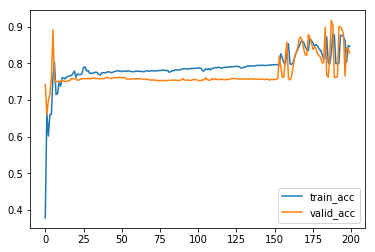

In [28]:
# import matplotlib.pyplot as mplot
mplot.plot(train_acc, label='train_acc')
mplot.plot(valid_acc, label='valid_acc')
mplot.legend()
mplot.show()

In [29]:
with tf.Session() as sess:
    # Restore the validated model
    saver.restore(sess, tf.train.latest_checkpoint('checkpoints'))
    #saver.restore(sess=sess, save_path='checkpoints/lstm-imu-har.ckpt')
    
    # Loop over batches of Test
    state = sess.run(fetches=initial_state)
    loss_batch, acc_batch = [], []
    for Xarr, Yarr in get_batches(X=Xtest, Y=Ytest, batch_size=N):

        # Feed dictionary
        feed_dict = {Xinputs:Xarr, Yindices:Yarr, initial_state:state}
        lossarr, state, accarr = sess.run(fetches=[loss, final_state, accuracy], feed_dict=feed_dict)
        loss_batch.append(lossarr)
        acc_batch.append(accarr)

    # Print info for every iter/epoch
    print("Test loss: {:6f}".format(np.mean(loss_batch)),
          "Test acc: {:.6f}".format(np.mean(acc_batch)))

INFO:tensorflow:Restoring parameters from checkpoints/lstm-imu-har.ckpt
Test loss: 0.466501 Test acc: 0.764733
